In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm


In [84]:
df=pd.read_csv("DailyDelhiClimateTest.csv")

In [85]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [86]:
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [88]:
df["date"]=pd.to_datetime(df["date"])

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          114 non-null    datetime64[ns]
 1   meantemp      114 non-null    float64       
 2   humidity      114 non-null    float64       
 3   wind_speed    114 non-null    float64       
 4   meanpressure  114 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.6 KB


In [90]:
df=df.set_index(df["date"])
# or can be written as df.set_index(df["date"],implace=True)

In [91]:
df=df.drop(columns="date")


In [92]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [93]:
newdf=df.copy()

In [94]:
newdf=newdf.drop(columns=["humidity","wind_speed","meanpressure"])

In [95]:
newdf.head()

,meantemp
date,
2017-01-01,15.913043
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000
2017-01-05,18.388889


<Axes: xlabel='date'>

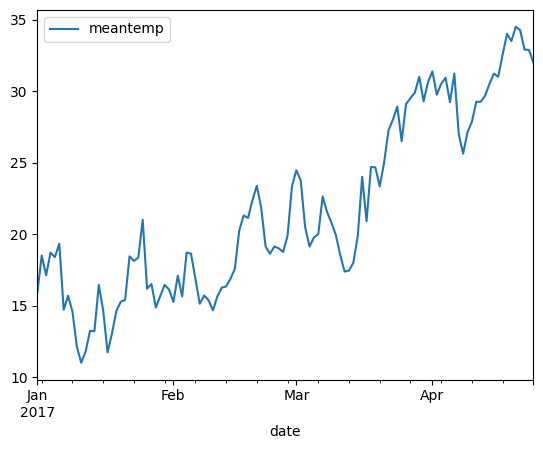

In [96]:
newdf.plot()

<Axes: xlabel='date'>

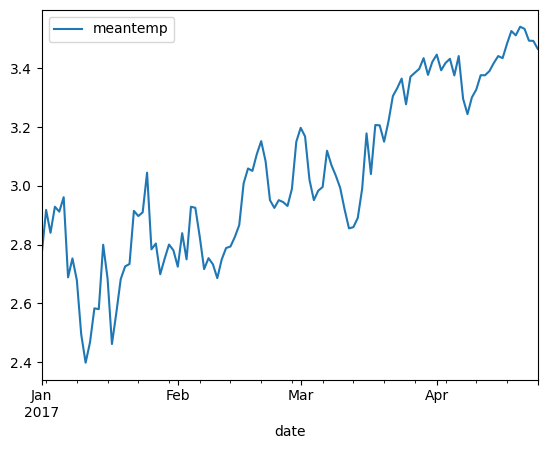

In [97]:
newdf=np.log(newdf)
newdf.plot()

In [98]:
from statsmodels.tsa.stattools import adfuller
def adtest(dataset):
    dftest=adfuller(dataset)
    print("ADF",dftest[0])
    print("pvalue",dftest[1])
    print("no of lags",dftest[2])
    

In [99]:
adtest(newdf["meantemp"])

ADF -1.4029343453064635
pvalue 0.5808685507999132
no of lags 0


In [100]:
from pmdarima import auto_arima


In [101]:
setwisefit=auto_arima(newdf["meantemp"],suppress_warnings=True)
setwisefit.summary()

C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 114.281
Date:                Sat, 12 Jul 2025   AIC                           -226.562
Time:                        16:33:12   BIC                           -223.835
Sample:                    01-01-2017   HQIC                          -225.455
                         - 04-24-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0077      0.001      8.967      0.000       0.006       0.009
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 7.97
Prob(Q):                              0.27   Prob(JB):                         0.02
Heteroskedasticity (H):               0.22   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
newdf["seasonal"]=newdf["meantemp"]-newdf["meantemp"].shift(1)
newdf.head()

,meantemp,seasonal
date,,
2017-01-01,2.767139,NaN
2017-01-02,2.917771,0.150632
2017-01-03,2.839728,-0.078043
2017-01-04,2.928524,0.088795
2017-01-05,2.911747,-0.016777


In [103]:
adtest(newdf["seasonal"].dropna())

ADF -11.75973278631877
pvalue 1.1556529358214617e-21
no of lags 0


<Axes: xlabel='date'>

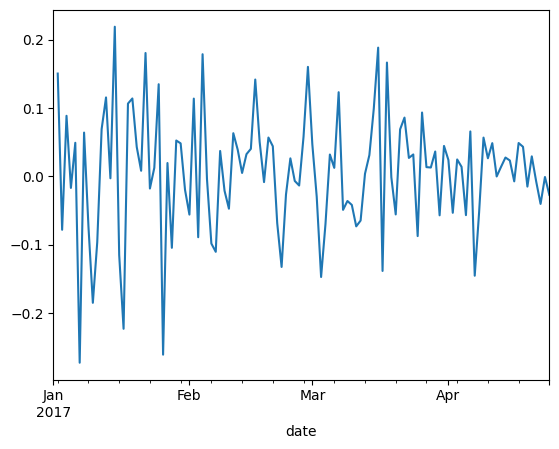

In [104]:
newdf["seasonal"].plot()

In [105]:
setwisefit=auto_arima(newdf["seasonal"].dropna(),suppress_warnings=True)
setwisefit.summary()

C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  113
Model:                        SARIMAX   Log Likelihood                 114.281
Date:                Sat, 12 Jul 2025   AIC                           -226.562
Time:                        16:33:13   BIC                           -223.835
Sample:                    01-02-2017   HQIC                          -225.455
                         - 04-24-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0077      0.001      8.968      0.000       0.006       0.009
===================================================================================
Ljung-Box (L1) (Q):                   1.21   Jarque-Bera (JB):                 7.97
Prob(Q):                              0.27   Prob(JB):                         0.02
Heteroskedasticity (H):               0.22   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

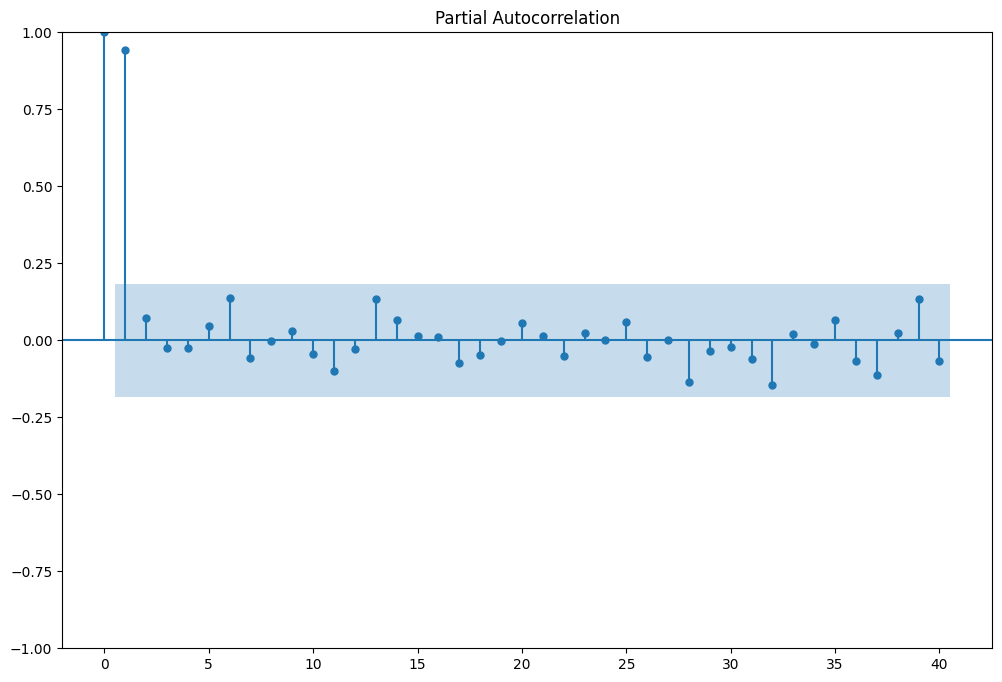

In [107]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot()
fig=sm.graphics.tsa.plot_pacf(newdf["meantemp"].iloc[:],lags=40,ax=ax1)

In [108]:
model=sm.tsa.statespace.SARIMAX(newdf["meantemp"],order=(1,1,1),seasonal_order=(1,1,1,12))
result=model.fit()

C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Dr. Asha\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model

<Axes: xlabel='date'>

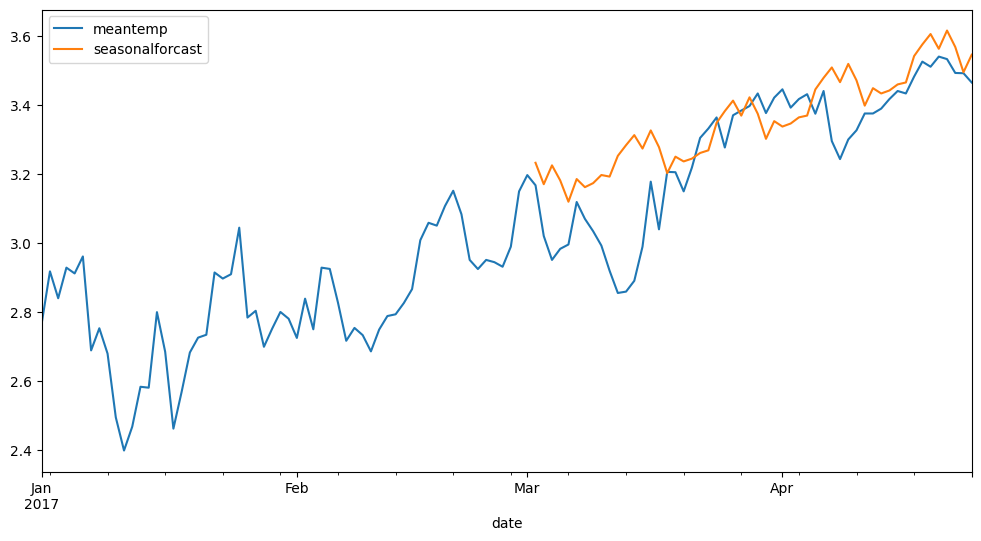

In [109]:
newdf["seasonalforcast"]=result.predict(start=60,end=115,dynamic=True)
newdf[["meantemp","seasonalforcast"]].plot(figsize=(12,6))